# 1. Pre-requisite
---



## Importing the Dependencies

---



In [1]:
!pip install seaborn

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
import matplotlib.pyplot as plt
import copy
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import StratifiedKFold

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(7)



In [5]:
# Deprecated
# tf.logging.set_verbosity(tf.logging.INFO)

# Use the compatible version
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)


## Data Collection and Analysis


### Data Description
**Diabetes**, Hypertension and Stroke Prediction  

- This is a clean dataset of over 70,692 survey responses to the CDC's BRFSS2015.
- There are 18 feature variables and 3 target variables, Diabetes, Hypertension, and Stroke, each target variable having 2 classes. This dataset is **balanced**.

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Only Using diabetes_data.csv
raw_df = pd.read_csv('diabetes_data.csv')

In [8]:
raw_df.shape

(70692, 18)

In [9]:
raw_df['Diabetes'].value_counts()

Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64

In [10]:
raw_df.describe

<bound method NDFrame.describe of         Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0       4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
70687   6.0  0.0       1.0        1.0  37.0     0.0                   0.0   
70688  10.0  1.0       1.0        1.0  29.0     1.0                   1.0   
70689  13.0  0.0       1.0        1.0  25.0     0.0                   1.0   
70690  11.0  0.0       1.0        1.0  18.0     0.0                   0.0   
70691   9.0  0.0       1.0        1.0  25.0     0.0                   1.0   

       PhysActivity  Fruits  Veggies  Hvy

In [11]:
raw_df.T

,0,1,2,3,4,5,6,7,8,9,...,70682,70683,70684,70685,70686,70687,70688,70689,70690,70691
Age,4.0,12.0,13.0,11.0,8.0,1.0,13.0,6.0,3.0,6.0,...,9.0,10.0,9.0,7.0,11.0,6.0,10.0,13.0,11.0,9.0
Sex,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
HighChol,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
CholCheck,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,26.0,26.0,26.0,28.0,29.0,18.0,26.0,31.0,32.0,27.0,...,37.0,28.0,27.0,38.0,27.0,37.0,29.0,25.0,18.0,25.0
Smoker,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
PhysActivity,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
Fruits,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
Veggies,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


### Features
1.   **Age** : 13-level age category  
        1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 /  
        6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 /  
        11 = 70-74 / 12 = 75-79 /  13 = 80 or older
2.   **Sex** : patient's gender  
0 = female  
1 = male
3.   **HighChol** :  
0 = no high cholesterol  
1 = high cholesterol
4.   **CholCheck** :  
0 = no cholesterol check in 5 years  
1 = yes cholesterol check in 5 years
5.   **BMI** :  
Body Mass Index
6.   **Smoker** : Have you smoked at least 100 cigarettes in your entire life?  
[Note: 5 packs = 100 cigarettes]  
0 = no  
1 = yes
7.   **HeartDiseaseorAttack** : coronary heart disease (CHD) or myocardial infarction (MI)   
0 = no  
1 = yes
8.   **PhysActivity** : physical activity in past 30 days - not including job  
0 = no  
1 = yes
9.   **Fruits** : Consume Fruit 1 or more times per day   
0 = no  
1 = yes
10.  **Veggies** : Consume Vegetables 1 or more times per day  
0 = no  
1 = yes
11.  **HvyAlcoholConsump** : adult men >=14 drinks per week; adult women>=7 drinks per week  
0 = no  
1 = yes
12.  **GenHlth** : Would you say that in general your health is: scale 1-5  
1 = excellent  
2 = very good  
3 = good  
4 = fair  
5 = poor
13.  **MentHlth** : days of poor mental health scale 1-30 days  
1 = excellent  
...  
30 = poor
14.  **PhysHlth** : physical illness or injury days in past 30 days scale 1-30  
1 = excellent  
...  
30 = poor
15.  **DiffWalk** : Do you have serious difficulty walking or climbing stairs?  
0 = no  
1 = yes
16.  **Stroke** : you ever had a stroke.  
0 = no  
1 = yes
17.  **HighBP** : BP : Blood Pressure  
0 = no high BP  
1 = high BP

- *Class* **Diabetes**  :  
    0 = no diabetes  
    1 = diabetes

In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [13]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


#### No Missing values

In [14]:
raw_df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [15]:
#### distributions of each feature

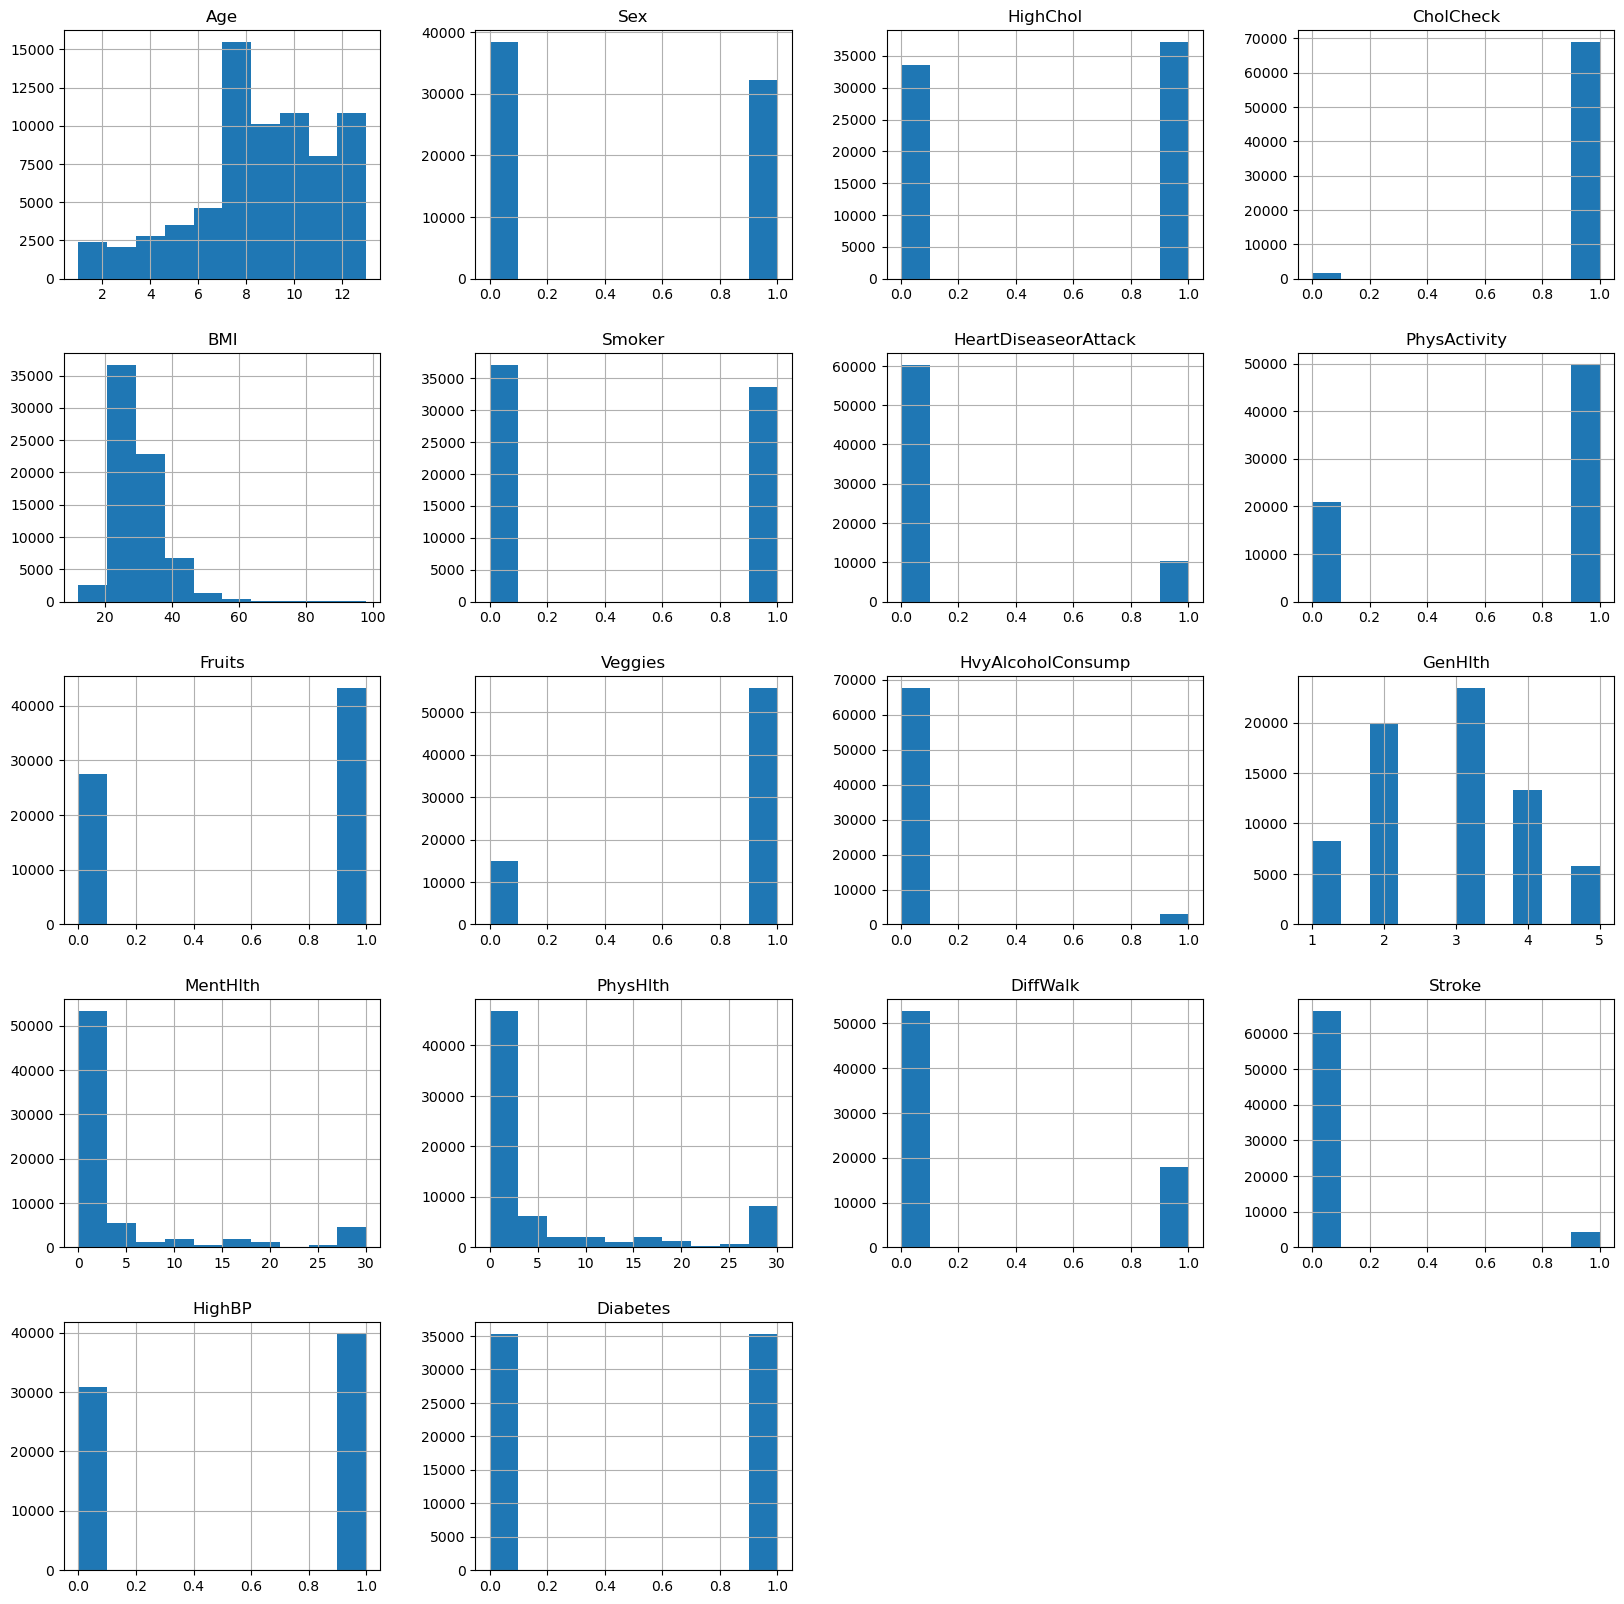

In [16]:
raw_df.hist(figsize=(20,20))
plt.show()

#### Check the proportion of the class from each feature

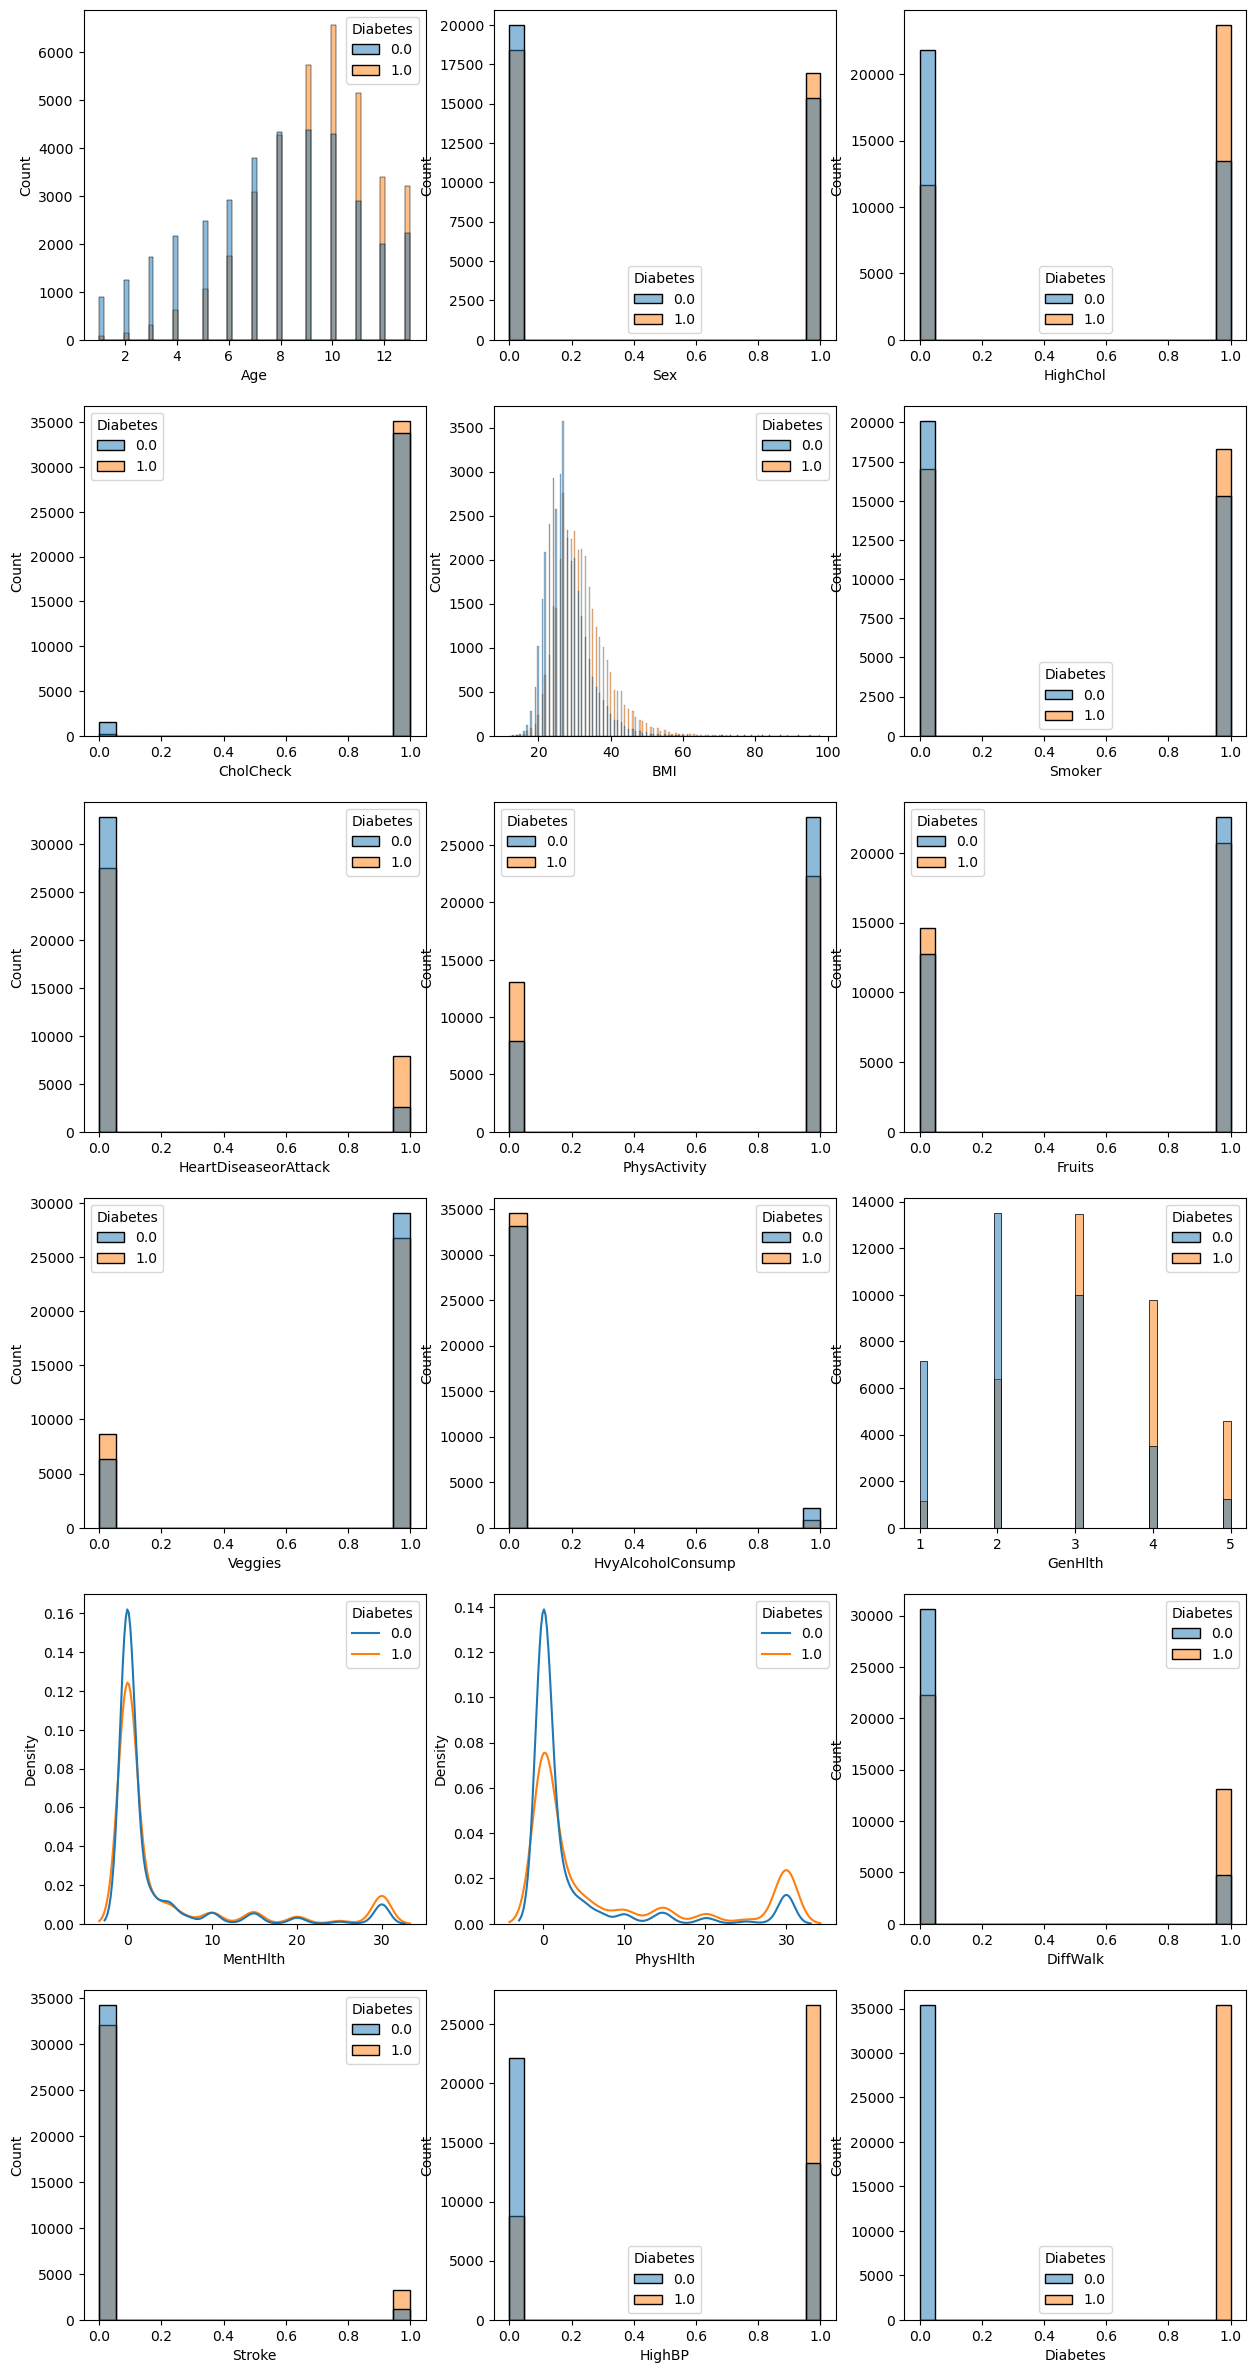

In [17]:
fig, ax = plt.subplots(6, 3, figsize=(15, 30))
i = 0
for col in raw_df.columns:
    if col=='MentHlth' or col=='PhysHlth':
        sns.kdeplot(data=raw_df, x=col, hue='Diabetes', ax=ax[i//3, i%3])
    else:
            sns.histplot(data=raw_df, x=col, hue='Diabetes', ax=ax[i//3, i%3])
    i+=1
plt.show()

## Pre-Processing

### Baseline (Zero-R)
- It is negligible as the dataset is balanced

In [18]:
print('- Total Instatnces')
print(len(raw_df.Diabetes), end='\n\n')
print('- Values and Counts of the Class')
print(raw_df.Diabetes.value_counts(), end='\n\n')
print('- Zero R of the Dataset')
print(raw_df.Diabetes.value_counts().max()/len(raw_df.Diabetes))

- Total Instatnces
70692

- Values and Counts of the Class
Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64

- Zero R of the Dataset
0.5


# 2. Naive Models and Results

- Only changes of iteration, rest are default
- Used Models are below.
1. SVM
2. Logistic Regression
3. Random Forest
4. Decision Tree
5. KNN
6. Naive Bayes(Gaussian)
7. MLP
8. AdaBoost

## Separate target and variables


In [19]:
X_df = raw_df.drop(columns=['Diabetes'])
y_df = raw_df['Diabetes']

## Stratified cross validation
### Train_Test---------Fold: 5
### Train-Validation---Fold: 10 (10% for validation)

In [20]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [21]:
def skfCV(X, y, model, n_splits_outer=5, n_splits_inner=10):
    best_scores = []

    # Outer Stratified K-Fold (1-fold for testing, remaining for training)
    outer_fold = StratifiedKFold(n_splits=n_splits_outer, shuffle=True)

    outer_scores = []

    for i, (train_index_outer, test_index_outer) in enumerate(outer_fold.split(X, y), start=1):
        X_train_outer, X_test_outer = X.iloc[train_index_outer, :], X.iloc[test_index_outer, :]
        y_train_outer, y_test_outer = y.iloc[train_index_outer], y.iloc[test_index_outer]

        inner_scores = []

        # Inner Stratified K-Fold (with 10% validation)
        inner_fold = StratifiedKFold(n_splits=n_splits_inner, shuffle=True)

        for j, (train_index_inner, val_index) in enumerate(inner_fold.split(X_train_outer, y_train_outer), start=1):
            X_train_inner, X_val = X_train_outer.iloc[train_index_inner, :], X_train_outer.iloc[val_index, :]
            y_train_inner, y_val = y_train_outer.iloc[train_index_inner], y_train_outer.iloc[val_index]

            # Normalize input features
            scaler = StandardScaler()
            X_train_inner_scaled = scaler.fit_transform(X_train_inner)
            X_val_scaled = scaler.transform(X_val)

            # Fit the model
            model.fit(X_train_inner_scaled, y_train_inner, epochs=150, batch_size=10, verbose=0)

            # Predict on the validation set
            y_pred_val = model.predict(X_val_scaled)
            y_pred_val = (y_pred_val > 0.5).astype(int)

            # Calculate accuracy and F1 score for each fold
            acc_fold = accuracy_score(y_val, y_pred_val)
            f1_fold = f1_score(y_val, y_pred_val)

            # Print or store accuracy and F1 score for each fold
            print(f'Fold {j}: Accuracy: {acc_fold:.4f}, F1 Score: {f1_fold:.4f}')

            inner_scores.append((acc_fold, f1_fold))

        # After the inner loop, calculate the mean accuracy and F1 score
        mean_acc_inner = np.mean([score[0] for score in inner_scores])
        mean_f1_inner = np.mean([score[1] for score in inner_scores])

        # Test on the outer test set
        X_test_outer_scaled = scaler.transform(X_test_outer)
        y_pred_test = model.predict(X_test_outer_scaled)
        y_pred_test = (y_pred_test > 0.5).astype(int)

        acc_test = accuracy_score(y_test_outer, y_pred_test)
        f1_test = f1_score(y_test_outer, y_pred_test)

        # Store the outer and inner scores for analysis
        outer_scores.append((acc_test, mean_acc_inner, f1_test, mean_f1_inner))

        # Print or store accuracy, mean accuracy, and F1 score for the outer fold
        print(f'\nTest Fold {i}: Test Accuracy: {acc_test:.4f}, Mean(train_validation) Accuracy: {mean_acc_inner:.4f}, Test F1 Score: {f1_test:.4f}, Mean(train_validation) F1 Score: {mean_f1_inner:.4f}\n')

    # After the outer loop, calculate the mean test accuracy and F1 score
    mean_acc_outer = np.mean([score[0] for score in outer_scores])
    mean_f1_outer = np.mean([score[2] for score in outer_scores])

    best_scores.append((mean_acc_outer, mean_f1_outer))

    print(f'Mean Test Accuracy: {mean_acc_outer:.4f}, Mean Test F1 Score: {mean_f1_outer:.4f}\n')

    return best_scores

In [22]:
# Assuming X_df has 17 features
model = create_model(input_dim=X_df.shape[1])


In [23]:
model_all = skfCV(X_df, y_df, model)



177/177 [==============================] - 0s 2ms/step
Fold 1: Accuracy: 0.7493, F1 Score: 0.7593
177/177 [==============================] - 0s 2ms/step
Fold 2: Accuracy: 0.7488, F1 Score: 0.7652
177/177 [==============================] - 0s 2ms/step
Fold 3: Accuracy: 0.7484, F1 Score: 0.7570
177/177 [==============================] - 0s 2ms/step
Fold 4: Accuracy: 0.7664, F1 Score: 0.7788
177/177 [==============================] - 0s 2ms/step
Fold 5: Accuracy: 0.7461, F1 Score: 0.7592
177/177 [==============================] - 0s 2ms/step
Fold 6: Accuracy: 0.7561, F1 Score: 0.7680
177/177 [==============================] - 0s 2ms/step
Fold 7: Accuracy: 0.7521, F1 Score: 0.7617
177/177 [==============================] - 0s 2ms/step
Fold 8: Accuracy: 0.7572, F1 Score: 0.7714
177/177 [==============================] - 0s 2ms/step
Fold 9: Accuracy: 0.7561, F1 Score: 0.7688
177/177 [==============================] - 0s 2ms/step
Fold 10: Accuracy: 0.7609, F1 Score: 0.7724
442/442 [========